# Função instalar pacotes

In [1]:
#Função instalar pacotes
InstalaPacotes = function(pck){
  if (pck %in% rownames(installed.packages())){
    mensagem <- paste("Pacote ", pck, " estava instalado")
  }else{
    mensagem <- paste("Instalando Pacote ", pck)
    install.packages(pck,repos = "http://cran.us.r-project.org", dep=TRUE)  
  }
  return(mensagem)  
}

InstalaPacotes ("arules")
InstalaPacotes ("arules")

library(arules)
library(arulesViz)

[1] "Pacote  arules  estava instalado"

[1] "Pacote  arules  estava instalado"

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: grid


# Obtem diretório de trabalho

In [6]:
wd<- getwd() #Inicializa wd com o diretório atual
diretorio <- function()
{ 
prompt <- "Digite o diretório de trabalho: "
  n <- readline(prompt)
  return(n)
}




In [4]:
wd<-diretorio()

Digite o diretório de trabalho: 


In [7]:
setwd(wd)

# Leitura das tabelas -> operações de redução e indexação de dados.

In [9]:

b1 = read.table("a.imessage.csv", header = TRUE, quote="\"",sep = ",")
b1.novo<-cbind.data.frame(as.Date(b1$date),as.numeric(b1$sentiment.comparative),as.numeric(b1$sentiment.negative_count),as.numeric(b1$sentiment.positive_count), as.numeric

(b1$sentiment.score), as.numeric(substr(b1$time,start=1,stop=2)))

colnames(b1.novo)<-c("date","sentiment.comparative","sentiment.negative_count","sentiment.positive_count","sentiment.score","hour")


b2 = read.table("b.imessage.csv", header = TRUE, quote="\"",sep = ",")
b2.novo<-cbind.data.frame(as.Date(b2$date),as.numeric(b2$sentiment.comparative),as.numeric(b2$sentiment.negative_count),as.numeric(b2$sentiment.positive_count), as.numeric

(b2$sentiment.score), as.numeric(substr(b2$time,start=1,stop=2)))

colnames(b2.novo)<-c("date","sentiment.comparative","sentiment.negative_count","sentiment.positive_count","sentiment.score","hour")


b3 = read.table("a.dayone.csv", header = TRUE, quote="\"",sep = ",")
b3.novo<-cbind.data.frame(as.Date(b3$date),as.numeric(b3$sentiment.comparative),as.numeric(b3$sentiment.negative_count),as.numeric(b3$sentiment.positive_count), as.numeric

(b3$sentiment.score), as.numeric(substr(b3$time,start=1,stop=2)))

colnames(b3.novo)<-c("date","sentiment.comparative","sentiment.negative_count","sentiment.positive_count","sentiment.score","hour")

rm(b1)
rm(b2)
rm(b3)


  |.................................................................| 100%
label: unnamed-chunk-1



[1] "\n```r\nload(url(\"https://github.com/flavio-carvalho/SentimentHourFP/blob/master/regras_padroes_frequentes.RData?raw=true\"))\n```"

Warning message in file(file, "rt"):
"não foi possível abrir o arquivo 'a.imessage.csv': No such file or directory"

ERROR: Error in file(file, "rt"): não é possível abrir a conexão


In [ ]:
# Carrega o RData (os passos anteriores foram executados)

In [1]:
knitr::knit(text ='```{r}
load(url("https://github.com/flavio-carvalho/SentimentHourFP/blob/master/regras_padroes_frequentes.RData?raw=true"))
```')

  |.................................................................| 100%
label: unnamed-chunk-1



[1] "\n```r\nload(url(\"https://github.com/flavio-carvalho/SentimentHourFP/blob/master/regras_padroes_frequentes.RData?raw=true\"))\n```"

# Junção das tabelas

In [7]:
dados <-rbind(b1.novo,b2.novo,b3.novo)

# Binning de 7 faixas de horários

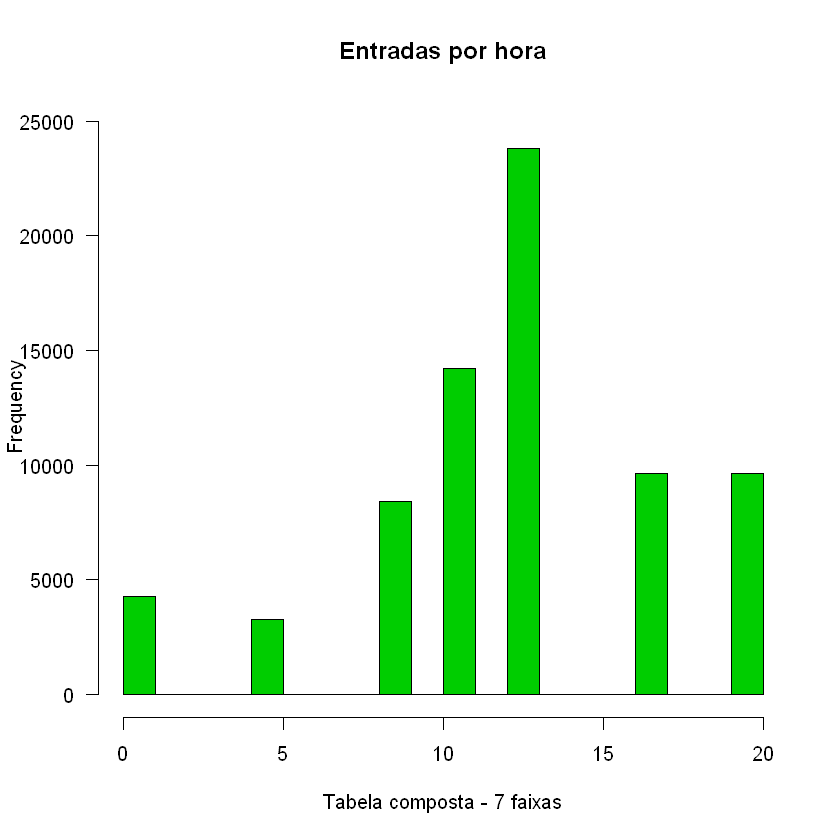

In [4]:
for(i in 1:nrow(dados)){
		 if ((dados$hour[i]  >= 05) & (dados$hour[i] < 9)) {
		dados$hour[i] <-05
} else if ((dados$hour[i]  >= 9) & (dados$hour[i] < 11)) {
		dados$hour[i] <-9 
} else if ((dados$hour[i]  >= 11) & (dados$hour[i] < 13)) {
		dados$hour[i] <- 11 
} else if ((dados$hour[i]  >= 13) & (dados$hour[i] < 17)) {
		dados$hour[i] <- 13 
} else if ((dados$hour[i]  >= 17) & (dados$hour[i] < 20)) {
		dados$hour[i] <- 17 
} else if ((dados$hour[i]  >= 20) & (dados$hour[i] < 23)) {
		dados$hour[i] <- 20 

} else
		dados$hour[i] <- 00 

}

hist(dados$hour,main="Entradas por hora",col = (3), las=1, xlim=c(0,20),ylim = c(0,25000),xlab = "Tabela composta - 7 faixas")

for(i in 1:nrow(dados)){
		 if ((dados$hour[i]  == 0)) {
		dados$hour[i] <-'Night'
} else if ((dados$hour[i]  == 5)) {
		dados$hour[i] <-'Early morning' 
} else if ((dados$hour[i]  == 9)) {
		dados$hour[i] <-'Mid-morning' 
} else if ((dados$hour[i]  == 11)) {
		dados$hour[i] <- 'Late morning' 
} else if ((dados$hour[i]  == 13)) {
		dados$hour[i] <- 'Afternoon'
} else if ((dados$hour[i]  == 17)) {
		dados$hour[i] <- 'Early evening' 
} else if ((dados$hour[i]  == 20)) {
		dados$hour[i] <- 'Late evening'  
}
}


# Visualização dos valores nas tabelas

In [6]:

summary(b1.novo$sentiment.positive_count)
summary(b2.novo$sentiment.positive_count)
summary(b3.novo$sentiment.positive_count)
summary(b1.novo$sentiment.negative_count)
summary(b2.novo$sentiment.negative_count)
summary(b3.novo$sentiment.negative_count)

summary(dados$sentiment.positive_count)
summary(dados$sentiment.negative_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.5357  1.0000 34.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.6257  1.0000 16.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    8.00   21.87   27.50 1498.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2062  0.0000 14.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1285  0.0000 12.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    4.00   11.45   14.00  816.00 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    0.000    0.000    0.906    1.000 1498.000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0000   0.0000   0.3116   0.0000 816.0000 

# Binning para sentiment.positive_count, sentiment.negative_count e sentiment.score

In [9]:

for(i in 1:nrow(dados)){
		 if ((dados$sentiment.positive_count[i]  >= 3)) {
		dados$sentiment.positive_count[i] <-3 

}
}

for(i in 1:nrow(dados)){
		 if ((dados$sentiment.negative_count[i]  >= 3) ) {
		dados$sentiment.negative_count[i] <-3 
 
}
}


 for(i in 1:nrow(dados)){
		 if ((dados$sentiment.score[i]  < -3) ) {
		dados$sentiment.score[i] <- 1
} else if (dados$sentiment.score[i]  > 3){
		dados$sentiment.score[i] <- 5 
} else if ((dados$sentiment.score[i]  >= -3) & (dados$sentiment.score[i]  < 0)) {
		dados$sentiment.score[i] <- 2 
} else if ((dados$sentiment.score[i]  > 0) & (dados$sentiment.score[i] <= 3)) {
		dados$sentiment.score[i] <- 4 
} else
		dados$sentiment.score[i] <- 3 

}


for(i in 1:nrow(dados)){
		 if ((dados$sentiment.positive_count[i]  == 0) ) {
		dados$sentiment.positive_count[i] <- 'zero'
} else if ((dados$sentiment.positive_count[i]  == 1)) {
		dados$sentiment.positive_count[i] <- 'low'
} else if ((dados$sentiment.positive_count[i]  == 2) ) {
		dados$sentiment.positive_count[i] <- 'medium' 
} else
		dados$sentiment.positive_count[i] <- 'high'  

}

for(i in 1:nrow(dados)){
		 if ((dados$sentiment.negative_count[i]  == 0) ) {
		dados$sentiment.negative_count[i] <- 'zero'
} else if ((dados$sentiment.negative_count[i]  == 1)) {
		dados$sentiment.negative_count[i] <- 'low'
} else if ((dados$sentiment.negative_count[i]  == 2) ) {
		dados$sentiment.negative_count[i] <- 'medium' 
} else
		dados$sentiment.negative_count[i] <- 'high'  

}

for(i in 1:nrow(dados)){
		 if ((dados$sentiment.score[i]  == 1) ) {
		dados$sentiment.score[i] <- '1- low-neg'
} else if ((dados$sentiment.score[i]  == 2)) {
		dados$sentiment.score[i] <- '2- neg'
} else if ((dados$sentiment.score[i]  == 3) ) {
		dados$sentiment.score[i] <- '3- zero' 
} else if ((dados$sentiment.score[i]  == 4) ) {
		dados$sentiment.score[i] <- '4- pos' 
} else
		dados$sentiment.score[i] <- '5- high-pos'  

}

sentiment<-subset(dados, select= -sentiment.comparative)
s2<-sentiment



# Geração de .csv para facilitar consultas futuras

In [10]:
# Geração de .csv para facilitar consultas futuras
d2 <- dados
write.csv(d2, file ="d2.csv")




# Cria um objeto de transações a partir de um arquivo

In [11]:
tr5<-read.transactions('d2.csv',format="basket",sep=",")

#




ERROR: Error in parse(text = x, srcfile = src): <text>:8:0: unexpected end of input
6: 
7: 
  ^


# Visualiza as transações

In [12]:
itemFrequencyPlot(tr5, support = 0.01)
itemFrequencyPlot(tr5,support=.01, topN=20,type="absolute",col='green',ylim=c(0,70000), xlab='Proporção dos atributos'

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: itemFrequencyPlot(tr5, support = 0.01)
2: itemFrequencyPlot(tr5,support=.01, topN=20,type="absolute",col='green',ylim=c(0,70000), xlab='Proporção dos atributos'
  ^


# Geração de regras com Apriori

In [13]:

rules2 <- apriori(tr5, parameter= list(supp=0.01, conf=.5))
rules2 <- sort(rules2, decreasing=TRUE,by="lift")
inspect(rules2)
plot(rules2,control=list(lift),shading=lift)

ERROR: Error in apriori(tr5, parameter = list(supp = 0.01, conf = 0.5)): não foi possível encontrar a função "apriori"
